In [24]:
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [25]:
# Reading in data
league_df = pd.read_csv(Path('2023_LoL_esports_match_data_from_OraclesElixir.csv'))
league_df.head() 

C:\Users\clayt\AppData\Local\Temp\ipykernel_25492\1704113970.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  league_df = pd.read_csv(Path('2023_LoL_esports_match_data_from_OraclesElixir.csv'))


,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,opp_csat15,golddiffat15,xpdiffat15,csdiffat15,killsat15,assistsat15,deathsat15,opp_killsat15,opp_assistsat15,opp_deathsat15
0,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,131.0,322.0,263.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,117.0,-357.0,-1323.0,-43.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,162.0,-479.0,-324.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,122.0,200.0,292.0,20.0,0.0,0.0,0.0,1.0,0.0,0.0
4,ESPORTSTMNT06_2753012,complete,NaN,LFL2,2023,Spring,0,2023-01-10 17:07:16,1,13.01,...,3.0,-216.0,-579.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [26]:
# Checking leagues and splits
print(league_df['league'].unique())
print(league_df['split'].unique())

['LFL2' 'DDH' 'EL' 'LPL' 'GL' 'LCKC' 'NEXO' 'UL' 'LVP SL' 'LCK' 'LFL'
 'PRM' 'LMF' 'SL (LATAM)' 'VL' 'CBLOL' 'LEC' 'NACL' 'LCO' 'CBLOLA' 'LHE'
 'NLC' 'GLL' 'ESLOL' 'LLA' 'EBL' 'TCL' 'PGN' 'LPLOL' 'LCS' 'HM' 'LJL' 'HC'
 'AL' 'PCS' 'LDL' 'VCS' 'EM' 'MSI' 'LAS' 'LRN' 'LRS' 'EPL' 'LJLA' 'CT'
 'WLDs' 'CDF' 'IC']
['Spring' nan 'Split 2' 'Split 1' 'Winter' 'Opening' 'Placements' 'Summer'
 'Champ 1' 'Split 3' 'Closing' 'Finals' 'BLX Masters' 'Champ 2']


In [56]:
# Aquiring team data for Spring LCS
lcs_team_league_df = league_df[(league_df['position'] == 'team') & (league_df['league'] == 'LCS') & (league_df['split'] == 'Spring')].reset_index(drop=True)

# Aquiring relevant columns for teams
lcs_team_league_df = lcs_team_league_df[['gameid','result','teamkills','teamdeaths','firstblood','gamelength','team kpm','dpm','damagetakenperminute','damagemitigatedperminute','ckpm','wpm','wcpm','vspm','earned gpm','cspm']].dropna()

# Displaying data
lcs_team_league_df.head()

,gameid,result,teamkills,teamdeaths,firstblood,gamelength,team kpm,dpm,damagetakenperminute,damagemitigatedperminute,ckpm,wpm,wcpm,vspm,earned gpm,cspm
0,ESPORTSTMNT02_3140740,1,25,8,1.0,1954,0.7677,3111.2794,3199.7441,4547.3797,1.0133,3.2242,1.2897,8.5977,1269.0890,31.3511
1,ESPORTSTMNT02_3140740,0,8,25,0.0,1954,0.2456,2041.1054,3913.1116,3212.4258,1.0133,2.8250,1.1361,6.2334,993.4084,30.2149
2,ESPORTSTMNT02_3141793,1,18,17,1.0,2582,0.4183,2397.3044,3296.9326,3496.2665,0.7901,3.9737,1.7893,10.2014,1228.6057,33.2998
3,ESPORTSTMNT02_3141793,0,16,19,0.0,2582,0.3718,2149.7986,3193.2688,3754.9961,0.7901,2.9977,1.9287,8.9698,1107.3974,31.5569
4,ESPORTSTMNT02_3139796,0,8,16,0.0,1896,0.2532,1966.5190,3274.9367,2920.7595,0.7595,2.8481,1.2025,6.7722,1057.6582,33.2911


In [57]:
# Creating dataframe comparing team data (result = 1 if team x won the match, result = 0 if team y won the match)
winning_teams_df = lcs_team_league_df[(lcs_team_league_df['result'] == 1)].reset_index(drop=True)
losing_teams_df =  lcs_team_league_df[(lcs_team_league_df['result'] == 0)].reset_index(drop=True)

combined_winning_teams_df = pd.merge(winning_teams_df, losing_teams_df, on='gameid', how='inner')
combined_losing_teams_df = pd.merge(losing_teams_df, winning_teams_df, on='gameid', how='inner')

combined_teams_df = pd.concat([combined_winning_teams_df, combined_losing_teams_df], ignore_index=True)
combined_teams_df = combined_teams_df.drop(['gameid','result_y'], axis=1)

combined_teams_df

,result_x,teamkills_x,teamdeaths_x,firstblood_x,gamelength_x,team kpm_x,dpm_x,damagetakenperminute_x,damagemitigatedperminute_x,ckpm_x,...,team kpm_y,dpm_y,damagetakenperminute_y,damagemitigatedperminute_y,ckpm_y,wpm_y,wcpm_y,vspm_y,earned gpm_y,cspm_y
0,1,25,8,1.0,1954,0.7677,3111.2794,3199.7441,4547.3797,1.0133,...,0.2456,2041.1054,3913.1116,3212.4258,1.0133,2.8250,1.1361,6.2334,993.4084,30.2149
1,1,18,17,1.0,2582,0.4183,2397.3044,3296.9326,3496.2665,0.7901,...,0.3718,2149.7986,3193.2688,3754.9961,0.7901,2.9977,1.9287,8.9698,1107.3974,31.5569
2,1,16,8,1.0,1896,0.5063,2508.0063,3107.5316,2652.5000,0.7595,...,0.2532,1966.5190,3274.9367,2920.7595,0.7595,2.8481,1.2025,6.7722,1057.6582,33.2911
3,1,10,6,1.0,1832,0.3275,1697.9803,2127.1834,2203.5917,0.5240,...,0.1965,1158.2751,2257.4345,1759.0611,0.5240,3.1769,2.5218,8.1878,1010.5349,33.6681
4,1,12,2,0.0,1894,0.3801,2359.6093,2173.3052,2066.9588,0.4435,...,0.0634,1282.6822,3657.6558,3280.4857,0.4435,4.2133,1.9958,9.5671,1024.0232,33.5797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,0,5,25,0.0,1727,0.1737,1891.9977,3301.4939,3679.3167,1.0423,...,0.8686,2769.3109,3084.1459,2585.1766,1.0423,3.2310,1.7024,8.1992,1453.3063,32.2061
242,0,16,20,1.0,2277,0.4216,1870.1449,3348.1950,4936.6535,0.9486,...,0.5270,2477.3386,2500.9750,3476.2055,0.9486,3.7681,1.7655,9.6443,1320.8432,31.8050
243,0,5,14,0.0,1705,0.1760,1303.1437,2880.1408,2570.9912,0.6686,...,0.4927,2240.9384,2346.0880,2898.6158,0.6686,3.4487,1.9355,9.8182,1372.7155,35.5073
244,0,4,14,0.0,1581,0.1518,1698.2922,3200.9488,2412.7135,0.6831,...,0.5313,2382.3529,2771.9165,1892.8653,0.6831,3.4535,1.4801,8.4630,1260.5313,33.3966


In [58]:
# Splitting data
y = combined_teams_df["result_x"]
X = combined_teams_df.drop(columns="result_x")
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)
X_train.shape

(184, 28)

In [78]:
# Creating model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

In [79]:
# Fitting the model
classifier.fit(X_train, y_train) 
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 0.9838709677419355


In [69]:
predictions = classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual Loss", "Actual Win"], columns=["Predicted Loss", "Predicted Win"]
)
cm_df

,Predicted Loss,Predicted Win
Actual Loss,30,1
Actual Win,0,31


In [63]:
# Creating dataframe of averages of team statistics from the 2023 summer split
summer_df = league_df[(league_df['position'] == 'team') & (league_df['league'] == 'LCS') & (league_df['split'] == 'Summer') & (league_df['playoffs'] == 0)].reset_index(drop=True)
summer_df = summer_df[['teamname','teamkills','teamdeaths','firstblood','gamelength','team kpm','dpm','damagetakenperminute','damagemitigatedperminute','ckpm','wpm','wcpm','vspm','earned gpm','cspm']]
summer_df = summer_df.groupby('teamname').mean()
summer_df.head(50)

,teamkills,teamdeaths,firstblood,gamelength,team kpm,dpm,damagetakenperminute,damagemitigatedperminute,ckpm,wpm,wcpm,vspm,earned gpm,cspm
teamname,,,,,,,,,,,,,,
100 Thieves,9.315789,12.000000,0.421053,1880.894737,0.301316,1916.057168,2955.307795,2912.019284,0.696932,3.221600,1.453258,7.863600,1101.635532,33.831432
Cloud9,14.315789,8.947368,0.526316,1682.947368,0.522937,2254.321674,2691.475426,2714.656484,0.830547,3.150863,1.435274,8.094268,1312.311542,34.985121
Dignitas,12.157895,16.263158,0.421053,1989.315789,0.366632,2195.070516,3101.337863,3520.813268,0.856574,3.063363,1.625495,7.867126,1125.640158,32.461621
Evil Geniuses,14.111111,11.388889,0.444444,1736.166667,0.474544,2264.340150,2979.869967,3137.441361,0.892106,3.088633,1.326472,7.448678,1243.286944,33.632967
FlyQuest,11.777778,13.111111,0.611111,1879.333333,0.390750,2024.137150,2819.215200,3181.353228,0.812406,3.195983,1.348078,7.729511,1111.087333,31.979472
Golden Guardians,15.315789,11.736842,0.631579,1939.842105,0.482011,2363.479658,2948.971595,3187.586995,0.837063,3.338105,1.482347,8.427926,1247.863553,33.847868
Immortals,10.611111,15.722222,0.388889,1839.166667,0.335500,2120.467928,3033.485161,3384.636372,0.861817,3.319689,1.328656,7.503889,1045.491567,31.560083
NRG,13.777778,13.722222,0.388889,2056.888889,0.395789,2241.039656,3012.516161,3495.123517,0.805683,3.577067,1.420639,8.159761,1147.226644,31.903100
TSM,11.333333,12.055556,0.555556,1816.111111,0.363861,1928.083483,3099.231878,3165.368550,0.776878,3.430133,1.340261,7.906950,1096.554556,32.525467


In [64]:
# Creating team data bracket
TSM = summer_df[summer_df.index == 'TSM'].copy()
FLY = summer_df[summer_df.index == 'FlyQuest'].copy()
NRG = summer_df[summer_df.index == 'NRG'].copy()
T100 = summer_df[summer_df.index == '100 Thieves'].copy()
C9 = summer_df[summer_df.index == 'Cloud9'].copy()
EG = summer_df[summer_df.index == 'Evil Geniuses'].copy()
TL = summer_df[summer_df.index == 'Team Liquid'].copy()
GG = summer_df[summer_df.index == 'Golden Guardians'].copy()
DIG = summer_df[summer_df.index == 'Dignitas'].copy()
IMT = summer_df[summer_df.index == 'Immortals'].copy()

In [65]:
# Creating versus data for week 1 set 1
C9['matchup'] = 'C9 vs GG'
GG['matchup'] = 'C9 vs GG'
match1 = pd.merge(C9, GG, on='matchup', how='inner')

TL['matchup'] = 'TL vs TSM'
TSM['matchup'] = 'TL vs TSM'
match2 = pd.merge(TL, TSM, on='matchup', how='inner')

IMT['matchup'] = 'IMT vs DIG'
DIG['matchup'] = 'IMT vs DIG'
match3 = pd.merge(IMT, DIG, on='matchup', how='inner')

EG['matchup'] = 'EG vs NRG'
NRG['matchup'] = 'EG vs NRG'
match4 = pd.merge(EG, NRG, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs T100'
T100['matchup'] = 'FLY vs T100'
match5 = pd.merge(FLY, T100, on='matchup', how='inner')

week1 = pd.concat([match1, match2, match3, match4, match5], axis=0, ignore_index=True)
week1.set_index('matchup', inplace=True)
week1


,teamkills_x,teamdeaths_x,firstblood_x,gamelength_x,team kpm_x,dpm_x,damagetakenperminute_x,damagemitigatedperminute_x,ckpm_x,wpm_x,...,team kpm_y,dpm_y,damagetakenperminute_y,damagemitigatedperminute_y,ckpm_y,wpm_y,wcpm_y,vspm_y,earned gpm_y,cspm_y
matchup,,,,,,,,,,,,,,,,,,,,,
C9 vs GG,14.315789,8.947368,0.526316,1682.947368,0.522937,2254.321674,2691.475426,2714.656484,0.830547,3.150863,...,0.482011,2363.479658,2948.971595,3187.586995,0.837063,3.338105,1.482347,8.427926,1247.863553,33.847868
TL vs TSM,14.833333,12.833333,0.611111,1952.611111,0.475278,2542.255772,2997.906967,3030.961194,0.854222,3.334289,...,0.363861,1928.083483,3099.231878,3165.368550,0.776878,3.430133,1.340261,7.906950,1096.554556,32.525467
IMT vs DIG,10.611111,15.722222,0.388889,1839.166667,0.335500,2120.467928,3033.485161,3384.636372,0.861817,3.319689,...,0.366632,2195.070516,3101.337863,3520.813268,0.856574,3.063363,1.625495,7.867126,1125.640158,32.461621
EG vs NRG,14.111111,11.388889,0.444444,1736.166667,0.474544,2264.340150,2979.869967,3137.441361,0.892106,3.088633,...,0.395789,2241.039656,3012.516161,3495.123517,0.805683,3.577067,1.420639,8.159761,1147.226644,31.903100
FLY vs T100,11.777778,13.111111,0.611111,1879.333333,0.390750,2024.137150,2819.215200,3181.353228,0.812406,3.195983,...,0.301316,1916.057168,2955.307795,2912.019284,0.696932,3.221600,1.453258,7.863600,1101.635532,33.831432


In [66]:
# Predicting if team 1 wins the set
classifier.predict(week1)

array([1, 1, 0, 1, 1], dtype=int64)

Actual set results  
  
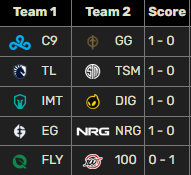


Final tournemt rankings  
  
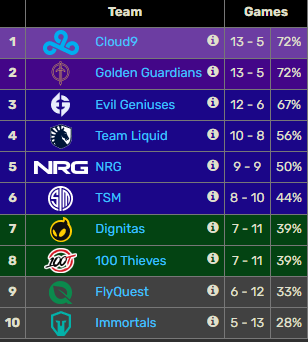

In [67]:
# Creating versus data for week 6 set 1
IMT['matchup'] = 'IMT vs EG'
EG['matchup'] = 'IMT vs EG'
match1 = pd.merge(IMT, EG, on='matchup', how='inner')

GG['matchup'] = 'GG vs TL'
TL['matchup'] = 'GG vs TL'
match2 = pd.merge(GG, TL, on='matchup', how='inner')

FLY['matchup'] = 'FLY vs TSM'
TSM['matchup'] = 'FLY vs TSM'
match3 = pd.merge(FLY, TSM, on='matchup', how='inner')

NRG['matchup'] = 'NRG vs C9'
C9['matchup'] = 'NRG vs C9'
match4 = pd.merge(NRG, C9, on='matchup', how='inner')

DIG['matchup'] = 'DIG vs T100'
T100['matchup'] = 'DIG vs T100'
match5 = pd.merge(DIG, T100, on='matchup', how='inner')

week6 = pd.concat([match1, match2, match3, match4, match5], axis=0, ignore_index=True)
week6.set_index('matchup', inplace=True)
week6


,teamkills_x,teamdeaths_x,firstblood_x,gamelength_x,team kpm_x,dpm_x,damagetakenperminute_x,damagemitigatedperminute_x,ckpm_x,wpm_x,...,team kpm_y,dpm_y,damagetakenperminute_y,damagemitigatedperminute_y,ckpm_y,wpm_y,wcpm_y,vspm_y,earned gpm_y,cspm_y
matchup,,,,,,,,,,,,,,,,,,,,,
IMT vs EG,10.611111,15.722222,0.388889,1839.166667,0.335500,2120.467928,3033.485161,3384.636372,0.861817,3.319689,...,0.474544,2264.340150,2979.869967,3137.441361,0.892106,3.088633,1.326472,7.448678,1243.286944,33.632967
GG vs TL,15.315789,11.736842,0.631579,1939.842105,0.482011,2363.479658,2948.971595,3187.586995,0.837063,3.338105,...,0.475278,2542.255772,2997.906967,3030.961194,0.854222,3.334289,1.561600,8.416117,1251.414450,32.916394
FLY vs TSM,11.777778,13.111111,0.611111,1879.333333,0.390750,2024.137150,2819.215200,3181.353228,0.812406,3.195983,...,0.363861,1928.083483,3099.231878,3165.368550,0.776878,3.430133,1.340261,7.906950,1096.554556,32.525467
NRG vs C9,13.777778,13.722222,0.388889,2056.888889,0.395789,2241.039656,3012.516161,3495.123517,0.805683,3.577067,...,0.522937,2254.321674,2691.475426,2714.656484,0.830547,3.150863,1.435274,8.094268,1312.311542,34.985121
DIG vs T100,12.157895,16.263158,0.421053,1989.315789,0.366632,2195.070516,3101.337863,3520.813268,0.856574,3.063363,...,0.301316,1916.057168,2955.307795,2912.019284,0.696932,3.221600,1.453258,7.863600,1101.635532,33.831432


In [68]:
# Predicting if team 1 wins the set
classifier.predict(week6)

array([0, 1, 1, 0, 1], dtype=int64)

Actual set results  
  
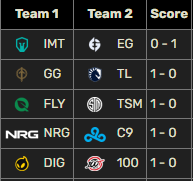

Final tournemt rankings  
  
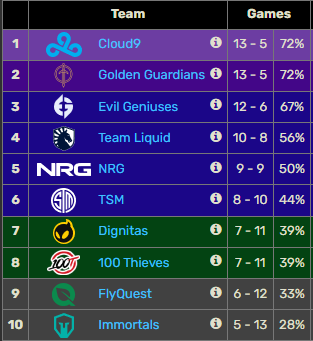